**Fachprojekt Dokumentenanalyse** *WS 22/23* -- *Philipp Oberdiek, Gernot A. Fink* -- *Technische Universität Dortmund, Lehrstuhl XII, Mustererkennung in eingebetteten Systemen*
---
# Aufgabe 5: Bag-of-Features

Bisher haben wir Bag-of-Words Repräsentationen auf maschinenlesbaren Texten betrachtet. Das Bag-of-Words Konzept lässt sich allerdings auch auf Bilder übertragen. Allgemeiner spricht man dann von Bag-of-Features. Dabei wird die 'Bag' (also das Histogramm) nicht mehr über Wortstämme gebildet sondern über andere typische Merkmalsausprägungen ([Introduction to the bag-of-features principle](http://arxiv.org/pdf/1101.3354.pdf)).

Für Bilder haben sich in diesem Zusammenhang Merkmale etabliert, die auf lokalen Bilddeskriptoren beruhen. Ein lokaler Bilddeskriptor liefert dabei eine (numerische) Beschreibung der lokalen Nachbarschaft eines bestimmten Bildpunkts.

Um die typischen lokalen Bilddeskriptoren für eine Problemdomäne (repräsentiert durch einen Beispieldatensatz) zu finden, führt man eine Clusteranalyse durch. Die Clusterrepräsentanten sind dann die typischen Ausprägungen für die Deskriptoren, die zu dem Cluster gehören. In Analogie zu dem Bag-of-Words Ansatz nennt man sie auch Visual Words und die Menge aller Visual Words das Visual Vocabulary.

Möchte man eine Bag-of-Features Repräsentation eines Bildes berechnen, berechnet man zunächst Deskriptoren. Da es im Vorfeld nicht immer einfach ist zu bestimmen welche Bildbereiche relevant bzw nicht relevant sind, berechnet man die Deskriptoren an den Punkten eines regelmässigen Gitters. Jedem Deskriptor wird nun das ähnlichste Visual Word aus dem Visual Vocabulary zugeordnet. Dies bezeichnet man als Quantisierung. Die Bag-of-Features wird gebildet indem man das Histogramm über die Visual Words in dem Bild bzw in einem Bildausschnitt berechnet.  
Erläutern Sie die Begriffe Visual Word und Visual Vocabulary mit Ihren eigenen Worten. Stellen Sie die Analogie zwischen Bag-of-Words und Bag-of-Features her:

**Antwort:**

Ein *Visual Word* wird einem Descriptor mit der höchsten Ähnlichkeit zugeordnet.
Ein *Visual Vocabulary* beinhaltet alle Visual Words, die wir zuvor berechneten Descriptoren zuordnen können.

Bag-of-Words          ->     Bag-of-Features  

Wort                  ->     Visual Word

typische Wortstämme   ->     Visual Vocabulary

## Lokale Bilddeskriptoren

Ein beliebter lokaler Bilddeskriptor ist der [SIFT (Scale Invariant Feature Transform)](http://www.robots.ox.ac.uk/~vgg/research/affine/det_eval_files/lowe_ijcv2004.pdf) Deskriptor (siehe auch Vorlesung Computer Vision). Das SIFT Verfahren besteht aus einem Schritt zur Detektion 'interessanter' lokaler Bildpunkte und einem Schritt zu deren Beschreibung (Deskriptor). Da wir die Deskriptoren in einem regelmässigen Gitter berechnen werden, wird der Detektor hier nicht verwendet. Der Deskriptor basiert auf Statistiken (Histogrammen) von (lokalen) Bildgradienten.

## Bildgradienten

Bei dem Bildgradienten handelt es sich um die (zweidimensionale) Ableitung der Bildintensität (Grauwert) nach $x$ und $y$. In der Praxis approximiert man ihn (diskretes Signal) durch spezielle Operatoren. Dieses Konzept soll zunächst anhand eines eindimensionalen Beipiels verdeutlicht werden.

Berechnen Sie (händisch) die [Kreuzkorrelation](https://de.wikipedia.org/wiki/Kreuzkorrelation) des Signals  
`[0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 9, 3, 0, 0]`  
mit der Maske  
`[-1, 0, 1]`  
Wie kann man die Randfälle behandeln?  
Diskutieren Sie Eigenschaften und Funktionen des Filters (Hochpass).

**Antwort:**

`[0, 1, 2, 2, 2, 2, -4, -5, 9, 3, -9, -3]`

- Randfälle können dadurch behandelt werden, indem die Maske nur bis zum Rand vom Grid angewendet wird, wodurch das Ergebnis in $x$ und $y$ Richtung jeweils um einen Pixel kleiner wird. Oder wir erweitern das Grid mit dem Randwerten, sodass die Maske genau auf das ursprüngliche Grid "drauf passt" und das Ergebnis der Maske wieder die gleichen Dimensionen hat wie das ursprüngliche Grid.
- Der Filter verstärkt die Unterschiede zwischen den verschiedenen Ableitungen, wodurch deutlicher wird, wo es Änderungen gibt.

Der Operator lässt sich auf zweidimensionale diskrete Signale verallgemeinern. Dabei benötigt man eine zweidimensionale Maske für horizontale Kanten und eine für vertikale Kanten. Zeigen Sie wie beide Masken durch geeignete Multiplikationen der Vektoren $[-1, 0, 1]$ und $[1, 1, 1]$ gebildet werden können. Es resultiert der sogenannte _Prewitt Operator_.

**Antwort:**

$$G_x = [1, 1, 1]^T * [-1, 0, 1] = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]$$
$$G_y = [-1, 0, 1]^T * [1, 1, 1] = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]$$

In der Praxis konstruiert man den Operator häufig mit dem Tiefpass Filter $[1, 2, 1]$ Dabei ergibt sich der _Sobel Operator_. Berechnen Sie beide Masken des Sobel Operators und diskutieren Sie den Unterschied zwischen Prewitt und Sobel.

**Antwort:**

$$G_x = [1, 2, 1]^T * [-1, 0, 1] = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]$$
$$G_y = [-1, 0, 1]^T * [1, 2, 1] = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]$$

Der *Sobel Operator* die Pixel, die direkt am aktuell betrachteten Pixel anliegen mehr als die Pixel, die weiter entfernt sind, wodurch die Unterschiede noch punktueller hervorgehoben werden im Vergleich zum *Prewitt Operator*.

An folgendem Dokumentenabbild sollen der Sobel-Operator, lokale Bilddeskriptoren und Bag-of-Features Repräsentionen erprobt werden. Es stehen zwei Versionen zur Verfügung. `2700270_small.png` ist für eine performantere Ausführung geeignet. `2700270.png` ist wesentlich hochauflösender, so dass bestimmte Details besser sichtbar werden. Bedenken Sie, dass bei der Verwendung von `2700270.png` unter Umständen die Deskriptorparameter (siehe unten) angepasst werden müssen.

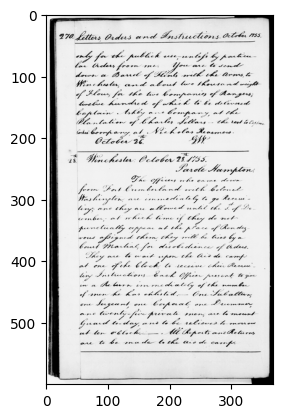

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
# added
%matplotlib inline

import sys

if ".." not in sys.path:
    sys.path.append("..")

import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

document_image_filename = os.path.abspath(os.path.join('..', 'images', '2700270_small.png'))
image = Image.open(document_image_filename)
# Für später folgende Verarbeitungsschritte muss das Bild mit float32-Werten vorliegen.
im_arr = np.asarray(image, dtype='float32')
# Die colormap legt fest wie die Intensitätswerte interpretiert werden.
plt.imshow(im_arr, cmap=cm.get_cmap('Greys_r'))

Berechnen Sie das Ergebnis des Sobel-Operators mit der horizontalen und vertikalen Maske. Visualisieren Sie die Ergebnisse und achten Sie auf eine geeignete Normalisierung der Werte. Eine Verschiebung des Wertebereichs reicht dabei aus. Für die Kreuzkorrelation können Sie die Funktion [`scipy.signal.correlate2d`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html) verwenden. Für die Visualisierung ist die Funktion [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) gut geeignet.

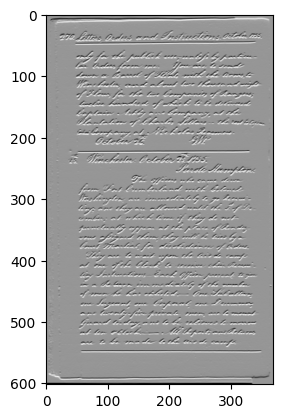

In [2]:
from scipy.signal import correlate2d

sobel_h = np.asarray([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_v = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

gx = correlate2d(im_arr, sobel_h, mode='full', boundary='fill')

plt.imshow(gx, cmap=cm.get_cmap('Greys_r'))

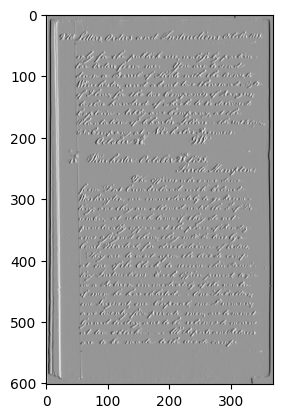

In [3]:
gy = correlate2d(im_arr, sobel_v, mode='full', boundary='fill')
plt.imshow(gy, cmap=cm.get_cmap('Greys_r'))

Folgend werden wir die Gradienten-Magnituden und -Orientierungen berechnen und visualisieren.

Visualisierung der Magnituden:

- Normalisieren Sie die Werte in das Intervall $[0, 1]$

Visualisierung der Orientierungen:

- Verwenden Sie den [HSV Farbraum](http://de.wikipedia.org/wiki/HSV-Farbraum)

Erläutern Sie warum dieser Farbraum dafür besonders geeignet ist.

**Antwort:**  

Der Farbraum ist ein Kreis und daher kann allein an den Farben abgelesen werden, in welche Richtung die Orientierung geht. Die Sättigung (S) und Helligkeit (V) sind für den Farbraum nicht so relevant wie für andere Farbräume (bspw. RGB).

Berechnen Sie nun die (approximierten) Gradienten-Magnituden und -Orientierungen. Gehen Sie dabei wie folgt vor:

- Berechnen Sie die Orientierungen im Bogenmass. Verwenden Sie dabei
  [`numpy.arctan2`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan2.html)
- Normalisieren Sie die Orientierungen im Bogenmass in das Intervall $[0, 1]$
- Erstellen Sie ein NumPy Array der Form $(M,N,3)$ wobei $M$ die Anzahl Zeilen und $N$ die Anzahl Spalten bezeichnet. Setzen Sie alle Werte auf 1. Verwenden Sie einen `float` Datentyp (siehe auch [`numpy.ones`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)).
- Schreiben Sie die normalisierten Orientierungen in den ersten Kanal des zuvor erstellen Arrays. Indizieren Sie das Array dazu mit `[:,:,0]`.
- Konvertieren Sie das Bild aus dem HSV Farbraum in den [RGB Farbraum](http://de.wikipedia.org/wiki/RGB-Farbraum). Dieser Farbraum wird standardmässig in matplotlib verwendet. Verwenden Sie für die Konvertierung die Funktion [`matplotlib.colors.hsv_to_rgb`](http://matplotlib.org/api/colors_api.html#matplotlib.colors.hsv_to_rgb)
- Visualisieren Sie das RGB Bild

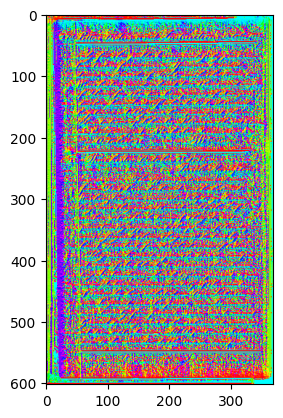

In [4]:
import matplotlib

g_dir = np.arctan2(gy, gx)
g_dir_normalized = (g_dir - g_dir.min()) / (g_dir.max() - g_dir.min())

im_orient_hsv = np.ones((gx.shape[0], gx.shape[1], 3), dtype='float32')
im_orient_hsv[:, :, 0] = g_dir_normalized
im_orient_rgb = matplotlib.colors.hsv_to_rgb(im_orient_hsv)
plt.imshow(im_orient_rgb)

Erstellen Sie abschliessend eine gemeinsame Visulisierung der Magnituden und Gradienten. Gehen Sie dabei vor wie bei der Visualisierung der Orientierungen, zusätzlich schreiben Sie aber noch die normalisierten Magnituden in den $V$ Kanal des HSV Bildes. Führen Sie die Konvertierung in den RGB Farbraum durch und visualisieren Sie das Ergebnis.

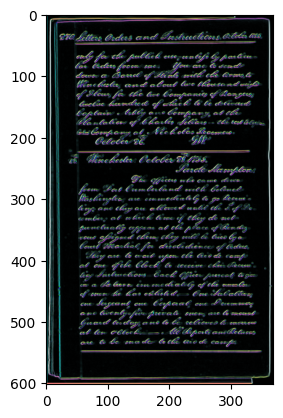

In [5]:
im_sobel_hsv = np.ones_like(im_orient_hsv)

# Gradienten
im_sobel_hsv[:, :, 0] = (gx - gx.min()) / (gx.max() - gx.min())
im_sobel_hsv[:, :, 1] = (gy - gy.min()) / (gy.max() - gy.min())

# Magnituden
g_mag = np.sqrt(gx**2 + gy**2)
im_sobel_hsv[:, :, 2] = (g_mag - g_mag.min()) / (g_mag.max() - g_mag.min())
im_sobel_rgb = matplotlib.colors.hsv_to_rgb(im_sobel_hsv)
plt.imshow(im_sobel_rgb)

Erläutern Sie wie sie den HSV Farbraum für die Visualisierung verwendet haben. Erklären Sie wie sowohl die Magnituden als auch die Orientierungen an jedem Bildpunkt sichtbar gemacht werden.

**Antwort:**

Wir haben der HSV Farbraum für die Farbraum benutzt, indem wir die drei Eigenschaften H, S und V mit drei Eigenschaften unserer Analyse verbunden haben. Die Farbe (H = Hue) wird durch die den Gradienten bestimmt, der mit dem vertikalen Sobel Filter generiert wurde und die Sättigung (S = Saturation) wird durch die horizontalen Sobel Filter bestimmt. Für die Helligkeit (V = Value) haben wir die Magnitude der Änderungen, die durch die Filter berechnet wurde bestimmt und auf diesen Wert gesetzt. So können wir durch die Farbe, die Sättigung und die Helligkeit direkt bestimmen, welche Magnitude und Orietierung an dem jeweiligem Pixel herrscht.

Basierend auf den Bildgradienten können nun Bilddeskriptoren berechnet werden. Der SIFT Deskriptor basiert auf lokalen Gradientenhistogrammen. Um die Gradienten in einem Histogramm zu erfassen, quantisiert man sie auf 8 Hauptrichtungen.

(array([[  0.,   0.,   0., ..., 599.,   1.,   0.],
        [  0.,   0.,   0., ..., 598.,   2.,   0.],
        [  8., 500.,  70., ...,  13.,   2.,   2.],
        ...,
        [  3.,  43.,   6., ...,   0.,   0.,   1.],
        [  1.,   1.,   1., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 370 BarContainer objects>)

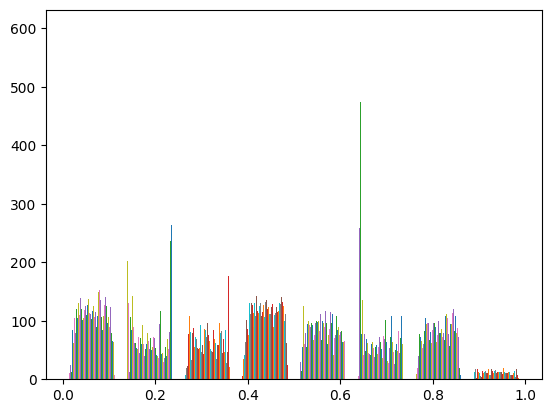

In [6]:
# Quantisieren Sie die Gradientenorientierungen in 8 Hauptrichtungen
num_bins = 8
bin = np.floor(g_dir_normalized * (num_bins - 1)) / (num_bins - 1)
plt.hist(bin, bins=num_bins)

Ein SIFT Deskriptor besteht nun aus 16 Gradientenhistogrammen über die 8 Hauptrichtungen. Die Gradientenhistogramme werden in $4\times 4$ Zellen berechnet, die um den Mittelpunkt des Deskriptors herum angeordnet sind. Numerisch wird ein SIFT Deskriptor durch einen 128 dimensionalen Vektor repräsentiert. Dieser ergibt sich indem man die 16 8 Bin Subhistogramme konkateniert.

Um SIFT Deskriptoren zu berechnen stehen Bibliotheken wie OpenCV oder vlfeat mit passenden Python Bindings zur Verfügung. Üblicherweise werden auf dem Dokumentenbild SIFT Deskriptoren in einem regelmässigen Gitter berechnet. Als Parameter werden dabei die

- Auflösung des Gitters (step)
- Die Deskriptorgröße eingestellt (size). Die Größe bezieht sich auf eine Zelle des Deskriptors. Die Seitenlänge eines gesamten Deskriptors ergibt sich also aus `cell_size * 4`.

Die Rueckgabe besteht aus den Frames und den Deskriptoren. Die Frames enthalten die x,y Koordinaten jedes einzelnen Deskriptors. `desc` enthält die 128 dimensionalen Vektoren.

Sie können die vorberechneten Deskriptoren aus den beiliegenden pickle Dateien verwenden. `2700270-full*` bezieht sich auf Deskriptoren, die auf dem Bild `2700270.png` berechnet wurden. `2700270-small*` bezieht sich auf die Bilddatei `2700270_small.png`. Die Parameter `step_size` und `cell_size` sind wie folgt in den Dateinamen kodiert:  
`2700270-[full|small]_dense-<step_size>_sift-<cell_size>_descriptors.p`

Alternativ finden Sie im Modul [`common.features`](../common/features.py) eine Funktion zur Berechnung von SIFT Deskriptoren auf Basis eines regulären Gitters (`compute_sift_descriptors`).

In [7]:
import cv2
import pickle
from common.features import compute_sift_descriptors

step_size = 65
cell_size = 15

pickle_densesift_fn = '2700270-small_dense-%d_sift-%d_descriptors.p' % (step_size, cell_size)
pickle_densesift_fn = '2700270-full_dense-%d_sift-%d_descriptors.p' % (step_size, cell_size)

with open(os.path.abspath(os.path.join('..', 'images', pickle_densesift_fn)), 'rb') as filehandle:
    frames, desc = pickle.load(filehandle)

Um eine Bag-of-Features Repräsentation des Bildes zu erstellen, wird ein Visual Vocabulary benötigt. Im Folgenden wird es in einer Clusteranalyse berechnet. Für die Clusteranalyse wird Lloyd's Version des k-means Algorithmus verwendet. Die Parameter sind

- Die Anzahl der Centroiden in der Clusteranalyse (`n_centroids`). Das entspricht der Größe des Visual Vocabulary bzw. der Anzahl von Visual Words.
- Die Anzahl von Durchläufen des Algorithmus (`iter`)
- Die Initialisierung (`minit`). Der Wert `'points'` führt zu einer zufälligen Auswahl von gegebenen Datenpunkten, die als initiale Centroiden verwendet werden.

Die Methode gibt zwei NumPy Arrays zurück:

 - Das sogenannte Codebuch. Eine zeilenweise organisierte Matrix mit Centroiden (hier nicht verwendet).
 - Einen Vektor mit einem Index für jeden Deskriptor in desc. Der Index bezieht sich auf den ähnlichsten Centroiden aus dem Codebuch (labels).

Die Abbildung von Deskriptoren auf Centroiden (Visual Words) bezeichnet man als Quantisierung.

In [8]:
from scipy.cluster.vq import kmeans2

n_centroids = 40
_, labels = kmeans2(desc, n_centroids, iter=20, minit='points')

Die Deskriptoren und deren Quantisierung werden nun visualisiert. Zu jedem Deskriptor werden dazu die Mittelpunkte und die $4\times 4$ Zellen eingezeichnet. Die Farbe des Mittelpunktes codiert den Index des Visual Words im Visual Vocabulary (Codebuch). Beachten Sie, dass durch diese Kodierung einige Farben sehr ähnlich sind. Da das Zeichnen der $4\times 4$ Zellen für jeden Deskriptor viel Performance kosten kann, ist es möglich es über die Flag `draw_descriptor_cells` abzuschalten.

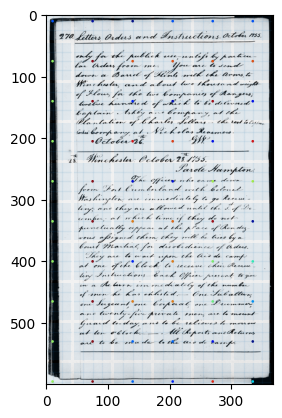

In [9]:
from matplotlib.patches import Circle, Rectangle
from matplotlib.lines import Line2D

draw_descriptor_cells = True
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(im_arr, cmap=cm.get_cmap('Greys_r'))
ax.autoscale(enable=False)
colormap = cm.get_cmap('jet')
desc_len = cell_size * 4
for (x, y), label in zip(frames, labels):
    color = colormap(label / float(n_centroids))
    circle = Circle((x, y), radius=1, fc=color, ec=color, alpha=1)
    rect = Rectangle((x - desc_len / 2, y - desc_len / 2), desc_len, desc_len, alpha=0.08, lw=1)
    ax.add_patch(circle)
    if draw_descriptor_cells:
        for p_factor in [0.25, 0.5, 0.75]:
            offset_dyn = desc_len * (0.5 - p_factor)
            offset_stat = desc_len * 0.5
            line_h = Line2D((x - offset_stat, x + offset_stat), (y - offset_dyn, y - offset_dyn), alpha=0.08, lw=1)
            line_v = Line2D((x - offset_dyn , x - offset_dyn), (y - offset_stat, y + offset_stat), alpha=0.08, lw=1)
            ax.add_line(line_h)
            ax.add_line(line_v)
    ax.add_patch(rect)

Varieren Sie die Größe des Visual Vocabulary sowie die Größe der Deskriptoren. Diskutieren Sie die Ergebnisse.

Üblicherweise arbeiten wir in der Mustererkennung mit einem Datensatz von Trainingsdaten und einem Datensatz von Testdaten. Da der Test die Erkennungsleistung auf unbekannten Daten simulieren soll, wird das visuelle Vokabular nur auf den Trainingsdaten berechnet. Um 'unbekannte' Deskriptoren aus dem Testdatensatz zu quantsieren, steht die Methode [`scipy.cluster.vq.vq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.vq.html) zur Verfügung.

# Bag-of-Features Repräsentation eines Bildes
Bisher haben wir die Visual Words bestimmt, die in unserem Bild vorkommen (Variable `labels`). Berechnen Sie nun die Bag-of-Features Repräsentation, indem Sie das Histogramm über die labels bilden. NumPy bietet dazu die Methode [`numpy.bincount`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html). Achten Sie dabei unbedingt darauf, dass das Histogramm einen Eintrag für jedes Visual Word enthält. Defaultmässig enthält es nur Einträge für die Visual Word Indizes, die in den Eingabedaten vorkommen.

Plotten Sie nun die Bag-of-Features Repräsentation. Benuzten Sie dazu einen Bar Plot. Färben sie die einzelnen Balken entsprechend der oben verwendeten Farbkodierung. Dazu können Sie die `colormap` (siehe oben) wiederverwenden. Zum setzen der Farbe gibt die `bar` Methode ein Liste mit Objekten zurück, die sich auf die einzelnen Balken beziehen. Übergeben Sie diesen Objekten den Farbwert indem Sie `set_color(color)` auf den Objekten der Liste aufrufen.

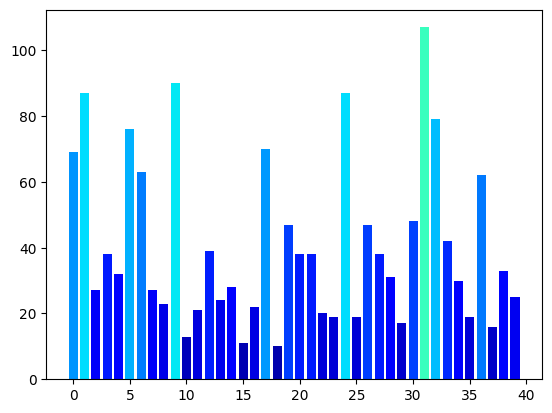

In [10]:
bin_count = np.bincount(labels, minlength=n_centroids)
bar_con = plt.bar(list(range(n_centroids)), bin_count, color=[colormap(bin) for bin in bin_count])
# set_color existiert nicht auf `bar_con`

# Lloyd's Algorithmus zum Clustern von Daten

Um eine bessere Vorstellung von Lloyd's Algorithmus zu bekommen soll dieser nun implementiert und anhand eines 2D Beispiels visualisiert werden. Dazu wird als erstes ein Beispieldatensatz erzeugt:

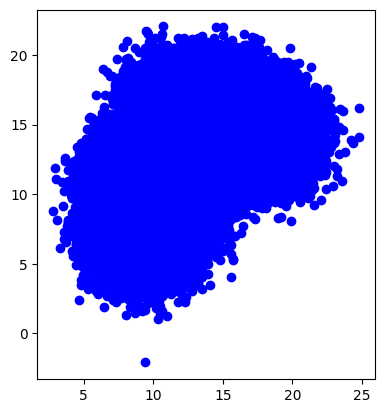

In [11]:
mean1 = np.array([10, 10])
cov1 = np.array([[3, .5],
                 [.5, 5]])

mean2 = np.array([15, 15])
cov2 = np.array([[5, -.7],
                 [-.7, 3]])
                 
mean3 = np.array([0, 0])
cov3 = np.array([[5, -.7],
                 [-.7, 3]])

mean4 = np.array([0, 20])
cov4 = np.array([[3, .5],
                 [.5, 5]])

mean5 = np.array([20, 0])
cov5 = np.array([[3, .5],
                 [.5, 5]])

n_samples = 2000 * 100
samples1 = np.random.multivariate_normal(mean1, cov1, n_samples//2)
samples2 = np.random.multivariate_normal(mean2, cov2, n_samples//2)
samples = np.vstack((samples1, samples2))

fig = plt.figure()
ax = fig.add_subplot(111)
xx = samples[:, 0]
yy = samples[:, 1]
ax.scatter(xx, yy, color='b', marker='o', alpha=1.0)
ax.set_aspect('equal')

Implementieren Sie nun Lloyds Algorithmus.
Bestimmen Sie in jeder Iteration den Quantisierungsfehler und brechen Sie das iterative Verfahren ab, wenn der Quantisierungsfehler konvergiert (einen sehr kleinen Schwellwert unterschreitet).
Für die Implementierung des Algorithmus sind folgende Funktionen hilfreich

- [`scipy.spatial.distance.cdist`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html)
- [`numpy.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
- [`numpy.argsort`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

Für die Initialisierung wählen Sie zufällig Punkte aus der Datenmenge. Dazu kann folgende Funktion hilfreich sein:

- [`numpy.random.permutation`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html)

Welche Codebuchgröße ist für die gegebene Verteilung von Daten geeignet?

In [12]:
from scipy.spatial.distance import cdist

def kmeans(
        data: np.ndarray, 
        n_centroids: int, 
        iterations: int,
        threshold: float = 1e-3
    ) -> np.ndarray:
    # initial k means, chosen from given data points
    means = np.random.permutation(data)[:n_centroids]

    # initial cluster membership
    distances = cdist(data, means)
    clusters = distances.argsort(axis=1)[:, 0].reshape(-1, 1)

    last_error = sys.maxsize

    # start calculating better centroids
    for i in range(iterations):
        distances = cdist(data, means)
        clusters = distances.argsort(axis=1)[:, 0].reshape(-1, 1)

        # calculate distance to corresponding centroid
        error = np.zeros(means.shape[0])

        for c in range(n_centroids):
            error[c] = distances[:, c][np.ravel(clusters == c)].sum()
        
        error_sum = error.sum()

        if error_sum < threshold or error_sum == last_error:
            break
            
        last_error = error_sum

        # update means
        for c in range(n_centroids):
            means[c] = data.sum(axis=0, where=clusters == c) / np.count_nonzero(clusters == c)

    return means, clusters, error_sum

centroids, cluster_labels, error = kmeans(samples, 2, 10)

Plotten Sie nun das Ergebnis der Clusteranalyse. Färben Sie dazu die Datenpunkte entsprechend ihrer Clusterzugehörigkeit. Zeichnen Sie auch die Centroiden mit ein.

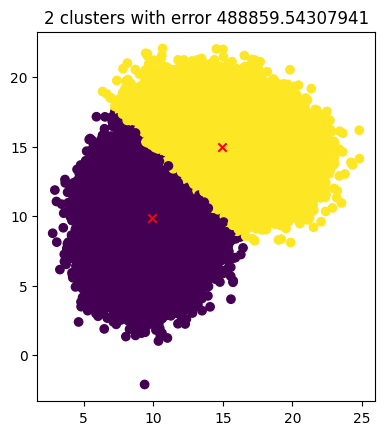

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
xx = samples[:, 0]
yy = samples[:, 1]
xxC = centroids[:, 0]
yyC = centroids[:, 1]
ax.scatter(xx, yy, marker='o', alpha=1.0, c=cluster_labels)
ax.scatter(xxC, yyC, color='r', marker='x', alpha=1.0)
ax.set_title(f"{centroids.shape[0]} clusters with error {error}")
ax.set_aspect('equal')
